In [22]:
import networkx as nx
import matplotlib.pyplot as plt
import os
import math
from nltk.tokenize import RegexpTokenizer
from nltk.stem import PorterStemmer
from collections import Counter
import pickle
import nltk.data
import errno
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/cslab/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [32]:
def preProcessing(S):
    ps = PorterStemmer()
    stop_words = set(stopwords.words('english'))
    tokenizer = RegexpTokenizer(r'[a-zA-Z]+')
    line = tokenizer.tokenize(S)
    if line != []:
        L = []
        for j in range(len(line)):
            x = line[j].lower()
            if x not in stop_words:
                L.append(ps.stem(x))
        L = ' '.join(L)
        L += ' '
    return L


In [14]:
Dict = nx.read_gpickle('dict.pickle')

Id2Word = {}

for key, val in Dict.items():
    Id2Word[val] = key

In [127]:
G = nx.read_gpickle(os.path.join('pickles','concept_graph4.gpickle'))
nodes_set = set(G.nodes())
G = G.to_undirected()

In [128]:
S = ''
with open('article.txt','r') as file:
    for line in file:
        S += line
S = preProcessing(S)
S = S.split(' ')

In [129]:
H = nx.Graph()
D = dict()
article_dict = dict()
for i in S:
    if i not in article_dict:
        if i in Dict:
            x = Dict[i]
            if x in nodes_set:
                article_dict[i] = x
                H.add_node(x)
                D[x] = (0,0,G.degree(x))

In [130]:
N = list(H.nodes())
for i in range(len(N)):
    for j in range(i+1,len(N)):
        if G.has_edge(N[i],N[j]) is True:
            H.add_edge(N[i],N[j])

In [131]:
curr_nodes_set = set()
new_nodes_set = set(H.nodes())
I = nx.Graph()
for i in S:
    if i in article_dict:
        j = article_dict[i]
        if j in new_nodes_set:
            if j not in curr_nodes_set:
                curr_nodes_set.add(j)
                I.add_node(j)
                for k in H.neighbors(j):
                    if k in curr_nodes_set:
                        I.add_edge(j,k)
                D[j] = (I.degree(j),H.degree(j),D[j][2])

In [132]:
X = []
Y = []
Z = []
T = []
c = 0
for i,j in D.items():
    c += 1
    T.append(c)
    X.append(j[0])
    Y.append(j[1])
    Z.append(j[2])

In [133]:
print(len(T),len(X),len(Y),len(Z))

132 132 132 132


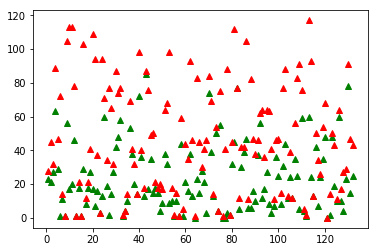

In [134]:
plt.plot(T,X,'g^')
plt.plot(T,Y,'r^')

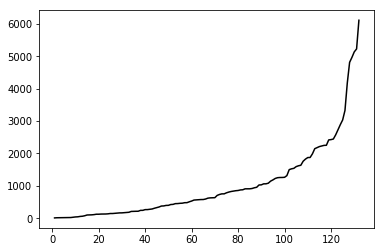

In [141]:
plt.plot(T,sorted(Z),'k-')